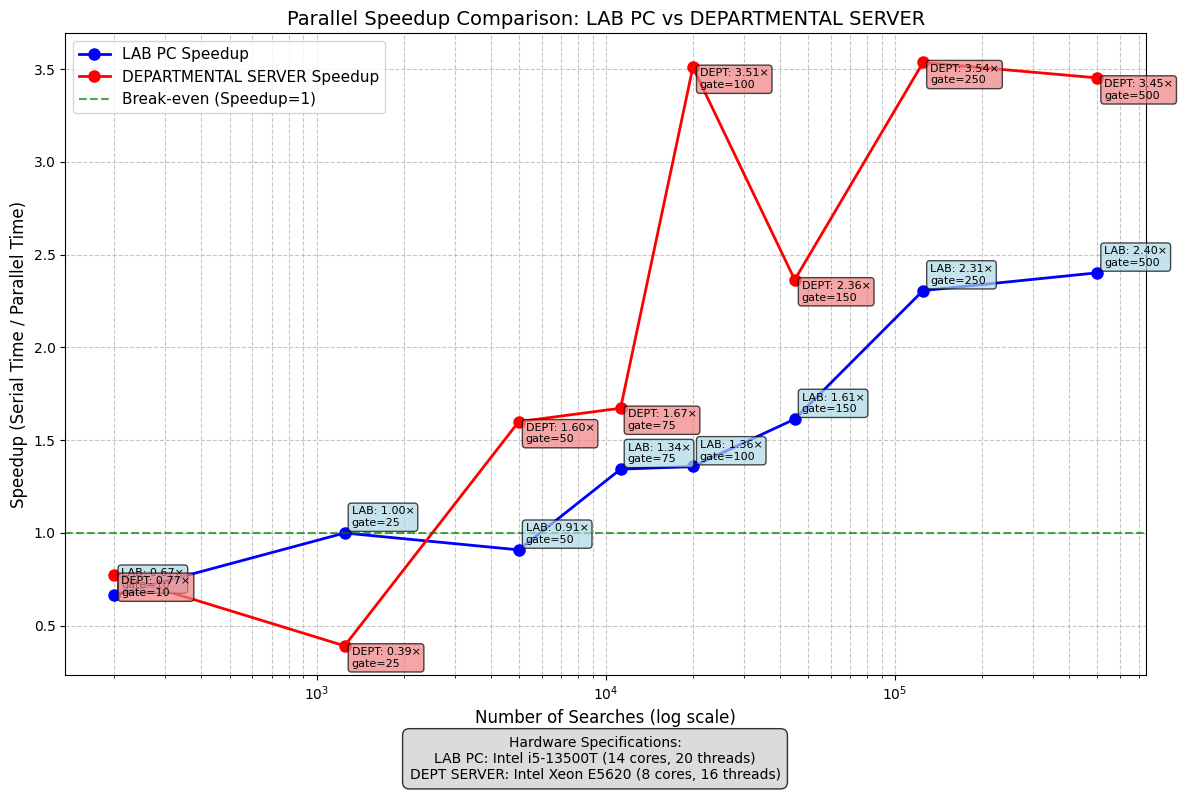

Speedup Comparison Data:
Gate Size  Searches   LAB Speedup  DEPT Speedup
--------------------------------------------------
10         200        0.67         0.77        
25         1250       1.00         0.39        
50         5000       0.91         1.60        
75         11250      1.34         1.67        
100        20000      1.36         3.51        
150        45000      1.61         2.36        
250        125000     2.31         3.54        
500        500000     2.40         3.45        


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data for both machines
gate_sizes = [10, 25, 50, 75, 100, 150, 250, 500]
searches = [200, 1250, 5000, 11250, 20000, 45000, 125000, 500000]

# Machine B (Departmental Server) - From your screenshot
serial_times_b = [17, 29, 120, 189, 688, 700, 1934, 8922]
parallel_times_b = [22, 74, 75, 113, 196, 296, 547, 2584]  # Using your provided parallel times
speedup_b = [serial/parallel for serial, parallel in zip(serial_times_b, parallel_times_b)]

# Machine A (Library PC) - From our previous analysis
serial_times_a = [2, 7, 20, 43, 72, 163, 459, 1756]
parallel_times_a = [3, 7, 22, 32, 53, 101, 199, 731]
speedup_a = [serial/parallel for serial, parallel in zip(serial_times_a, parallel_times_a)]

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(searches, speedup_a, 'bo-', linewidth=2, markersize=8, label='LAB PC Speedup')
plt.plot(searches, speedup_b, 'ro-', linewidth=2, markersize=8, label='DEPARTMENTAL SERVER Speedup')

# Add a horizontal line at speedup=1 (break-even point)
plt.axhline(y=1, color='g', linestyle='--', alpha=0.7, label='Break-even (Speedup=1)')

# Customize the plot
plt.xscale('log')  # Log scale for x-axis to spread out the data
plt.xlabel('Number of Searches (log scale)', fontsize=12)
plt.ylabel('Speedup (Serial Time / Parallel Time)', fontsize=12)
plt.title('Parallel Speedup Comparison: LAB PC vs DEPARTMENTAL SERVER', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=11)

# Add annotations for each point for both machines
for i, (search, sp_a, sp_b) in enumerate(zip(searches, speedup_a, speedup_b)):
    # Annotate Machine A (LAB PC)
    plt.annotate(f'LAB: {sp_a:.2f}×\ngate={gate_sizes[i]}',
                 (search, sp_a),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=8,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

    # Annotate Machine B (Departmental Server)
    plt.annotate(f'DEPT: {sp_b:.2f}×\ngate={gate_sizes[i]}',
                 (search, sp_b),
                 xytext=(5, -15),
                 textcoords='offset points',
                 fontsize=8,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))

# Add text box with hardware specs
hardware_text = (
    "Hardware Specifications:\n"
    "LAB PC: Intel i5-13500T (14 cores, 20 threads)\n"
    "DEPT SERVER: Intel Xeon E5620 (8 cores, 16 threads)"
)
plt.figtext(0.5, 0.02, hardware_text, ha='center', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the hardware specs
plt.savefig('speedup_comparison_graph.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the data for verification
print("Speedup Comparison Data:")
print(f"{'Gate Size':<10} {'Searches':<10} {'LAB Speedup':<12} {'DEPT Speedup':<12}")
print("-" * 50)
for i in range(len(gate_sizes)):
    print(f"{gate_sizes[i]:<10} {searches[i]:<10} {speedup_a[i]:<12.2f} {speedup_b[i]:<12.2f}")